<a href="https://colab.research.google.com/github/CharityDuran/Charity_INFO5502_Summer2022/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (08/02/2022 11:59'AM' - 08/05/2022 11:59PM, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Q1 Task Decription (50 Points)

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [3]:
### You code here:
import pandas as pd
import numpy as np
import csv as csv
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

#read in taining data and display 
train_df=pd.read_csv('/content/train_luc.csv', header=0)
#output number of samples and columns (features)
print('\nThe number of samples:',train_df.shape[0],'\nNumber of features:', train_df.shape[1])
train_df.head()







The number of samples: 9174 
Number of features: 12


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#output basic stats
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


In [12]:
#create new column for hour of the day, month, day of month seperately
def hour_of_day(dt):
  return datetime.strptime(dt,'%Y-%m-%d %H:%M:%S').time().hour
train_df['hour']=train_df['datetime'].map(hour_of_day)
def month(dt):
  return datetime.strptime(dt,'%Y-%m-%d %H:%M:%S').date().month
train_df['month']=train_df['datetime'].map(month)
def day(dt):
  return datetime.strptime(dt,'%Y-%m-%d %H:%M:%S').date().day
train_df['day']=train_df['datetime'].map(day)
train_df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


hours: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Text(0.5, 1.0, 'Measured bike use over 2 years')

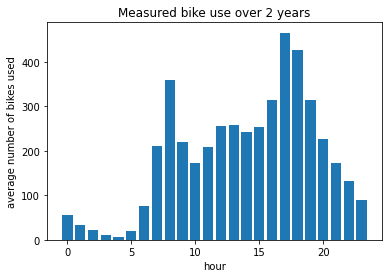

In [18]:
#make visualizations of data
#hours of the day
hours = np.unique(train_df['hour'])
print('hours:',hours)
hours_mean={}
for h in hours:
  temp_df = train_df.loc[train_df['hour']==h]
  hours_mean[h]=temp_df['count'].mean()

plt.bar(hours,[hours_mean[h]for h in hours])
plt.xlabel('hour')
plt.ylabel('average number of bikes used')
plt.title('Measured bike use over 2 years')





days: <function day at 0x7f81532c3560>


Text(0.5, 1.0, 'Measured bike use over 2 years')

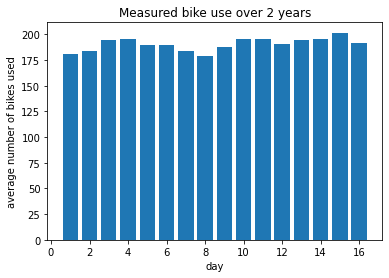

In [16]:
#day of the month
days = np.unique(train_df['day'])
print('days:',day)
days_mean={}
for d in days:
  temp_df = train_df.loc[train_df['day']==d]
  days_mean[d]=temp_df['count'].mean()

plt.bar(days,[days_mean[d]for d in days])
plt.xlabel('day')
plt.ylabel('average number of bikes used')
plt.title('Measured bike use over 2 years')

months: <function month at 0x7f81532ca290>


Text(0.5, 1.0, 'Measured bike use over 2 years')

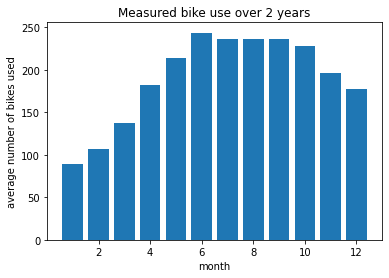

In [19]:
#month of year
months = np.unique(train_df['month'])
print('months:',month)
months_mean={}
for m in months:
  temp_df = train_df.loc[train_df['month']==m]
  months_mean[m]=temp_df['count'].mean()

plt.bar(months,[months_mean[m]for m in months])
plt.xlabel('month')
plt.ylabel('average number of bikes used')
plt.title('Measured bike use over 2 years')

In [52]:
#set up model and features
cols = ['hour','day','month','atemp','weather']
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

#Models to try
#model=DecisionTreeRegressor()
##model=LinearRegression()
model=KNeighborsRegressor(n_neighbors = 5)
##model=LinearSVR()
#model=RandomForestRegressor(n_estimators=10)

#helps to keep track of parameters and model chosen
print('columns selected for later:',cols)
print(model)

#split training and test data
n=len(train_df)
#fraction of data split off for testing
training_size=0.75

#set up separate training and testing datasets
#shuffled array indices
indices=np.array(range(n))
from numpy.random import shuffle
shuffle(indices)
split_point = int(n*training_size)
mytrain_i=indices[0:split_point]
mytest_i=indices[split_point:]

#now use those shuffled indices to seprate training from test data frames
new_train_df=train_df.iloc[mytrain_i]
new_test_df=train_df.iloc[mytest_i]

print('samples in new training subset:', len(new_train_df))
print('samples in the new test subset:', len(new_test_df))

#fit model to a protion of training set, test on the rest and evaluate
#start with training subset of orginal dataset
model.fit(new_train_df[cols],new_train_df['count'])

#pred on the testing subset of orginal taining data
pred_count = model.predict(new_test_df[cols])

#score the model on the new test set
from sklearn.metrics import mean_squared_error
rms=np.sqrt(mean_squared_error(new_test_df['count'],pred_count))
print('RMS error:',rms)


columns selected for later: ['hour', 'day', 'month', 'atemp', 'weather']
KNeighborsRegressor()
samples in new training subset: 6880
samples in the new test subset: 2294
RMS error: 100.78913549758467


In [61]:
#Create output
test_df=pd.read_csv('/content/test_luc.csv', header=0)
print('n/Number of samples:',test_df.shape[0],'n/Number of features:',test_df.shape[1])

#Add new features used in test dataset
def hour_of_day(dt):
  return datetime.strptime(dt,'%Y-%m-%d %H:%M:%S').time().hour
test_df['hour']=test_df['datetime'].map(hour_of_day)
def month(dt):
  return datetime.strptime(dt,'%Y-%m-%d %H:%M:%S').date().month
test_df['month']=test_df['datetime'].map(month)
def day(dt):
  return datetime.strptime(dt,'%Y-%m-%d %H:%M:%S').date().day
test_df['day']=test_df['datetime'].map(day)
test_df.head()

#fit model=KNeighborsRegressor(n_neighbors = 5) to entire training data set
model.fit(train_df[cols], train_df['count'])

#apply to test data to predict number of bike rentals
pred_count = model.predict(test_df[cols])

#add the prediction column into dataframe
test_df['count']=pred_count

#save file as csv with a header column and datetime row
test_df = test_df[['datetime','count']].to_csv('my_prediction.csv', index=False, header=True)





n/Number of samples: 1712 n/Number of features: 9


 Question 2 (20 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

 ### Your code

In [62]:
### You code here:
import pandas as pd
import numpy as np
import csv as csv
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

#read in stock data 
stock_df=pd.read_csv('/content/portfolio_data.csv', header=0)
#output number of samples and columns (features)
print('\nThe number of samples:',stock_df.shape[0],'\nNumber of features:', stock_df.shape[1])
stock_df.head()



The number of samples: 1520 
Number of features: 5


,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [80]:
#create seperate columne for month
def year(dt):
  return datetime.strptime(dt,'%M/%d/%Y').date().year
stock_df['Year']=stock_df['Date'].map(year)
stock_df.head()

,Date,AMZN,DPZ,BTC,NFLX,month,Year
0,5/1/2013,248.229996,51.190983,106.250000,30.415714,1,2013
1,5/2/2013,252.550003,51.987320,98.099998,30.641428,1,2013
2,5/3/2013,258.049988,52.446388,112.900002,30.492857,1,2013
3,5/6/2013,255.720001,53.205257,109.599998,30.098572,1,2013
4,5/7/2013,257.730011,54.151505,113.199997,29.464285,1,2013


<function matplotlib.pyplot.show>

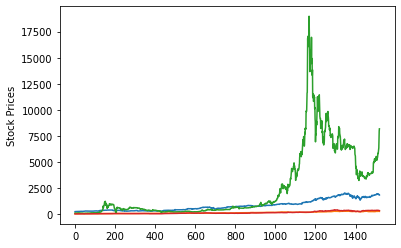

In [83]:
stock_df.AMZN.plot()
stock_df.DPZ.plot()
stock_df.BTC.plot()
stock_df.NFLX.plot()
plt.ylabel('Stock Prices')
plt.show

In [96]:
from sklearn.linear_model import LinearRegression
import datetime as dt
stock_df['Date']=pd.to_datetime(stock_df['Date'])
stock_df['Date']=stock_df['Date'].map(dt.datetime.toordinal)
x=stock_df['Date']
y=stock_df['AMZN']
#split training and test data
t=0.75
t=int(t*len(stock_df))
x_train = x[:t]
y_train = y[:t]
x_test=x[:t]
y_test=y[t:]
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

model=LinearRegression().fit(x_train,y_train)
predicted_price=linear.predict(x_test)
predicted_price=pd.DataFrame(predicted_price, index=y_test.index,columns=['price'])


AttributeError: ignored